Done loading notebook.# Lab: Predict Mortgage Default 

## Introduction

The purpose of this lab demonstrate how a data scientist can use notebooks for implementing various analytics use cases. With a notebook a data scientist can provide explanation for what happens in the code and add visualizations. We chose a simple analytics use case for this lab - predicting mortgage default using the Spark ML Decision Tree Classifier. 


## Notebooks

### This notebook IDE is built on top of open source Jupyter notebooks. A notebook is a file type that contains 
1. Code (Python, R or Scala)
2. Markdown (comments like the ones you are reading now)
3. A connection to a kernel (runtime environment). The kernel in this environment is provided by Spark. 

### The content of a notebook is organized in "cells". The two main types of cells are "code" and "markdown". As you review the rest of the notebook, you may see some text that's marked with "out". The "out" tag is for output of code directly above it. If you don't see the out tag, then the output may have been cleared or the code in the cell didn't produce any printable output. 

### When we run notebooks, the code that we provide runs in the specific kernel for each programming language (the notebook IDE automatically starts a kernel for the programming language in which the notebook is implemented). You will notice that the notebook IDE has a menu that's dedicated to kernels with actions like start, restart, reconnect, etc. 

### When we work with notebooks, we have an option to run the entire notebook (all cells in the notebook) or individual cells. If you are running individual cells, it's important that the cells above it had been run. 

### If you want to run a cell, position the cursor at the end of the last line, and select menu Cell -> Run Cells (or click the Run icon). When the cell is running, you will see an an asterisks next to the cell [*]. Don't run any subsequent cells until execution is done.  


### Since Notebooks are based on an open source technlogy, you can find many tutorials and sample Notebooks. 
Here are some notebooks that show "functional/technical" features of Python and R: https://github.com/IBMDataScience/sample-notebooks
You can find additional notebooks on the Community page of DSX.

## Mortgage Default Use Case Implementation

### Step 1: Connect to Object Storage

We start with connecting to Object Storage. Object Storage is the Bluemix environment for storing flat files. If you go back to the Project dashboard and click on Data Assets, you'll see 3 files - Default.csv, Customer.csv, Property.csv.  

The following code has been generated by DSX.  

In [12]:
from pyspark.sql import SparkSession





### Step 2: Load files
Load Customer File

In [13]:
customer = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .option('inferschema','true')\
  .load('swift://MortgageDefault.' + name + '/Customer.csv')
customer.take(5)


[Row(ID=100272.0, Income=43593.0, AppliedOnline=u'YES', Residence=u'Owner Occupier', Yrs at Current Address=13.0, Yrs with Current Employer=0.0, Number of Cards=1.0, Creditcard Debt=2315.0, Loans=0.0, Loan Amount=12820.0),
 Row(ID=100273.0, Income=45706.0, AppliedOnline=u'YES', Residence=u'Owner Occupier', Yrs at Current Address=17.0, Yrs with Current Employer=16.0, Number of Cards=2.0, Creditcard Debt=373.0, Loans=1.0, Loan Amount=7275.0),
 Row(ID=100279.0, Income=44756.0, AppliedOnline=u'YES', Residence=u'Owner Occupier', Yrs at Current Address=19.0, Yrs with Current Employer=6.0, Number of Cards=1.0, Creditcard Debt=2117.0, Loans=1.0, Loan Amount=10760.0),
 Row(ID=100280.0, Income=44202.0, AppliedOnline=u'YES', Residence=u'Owner Occupier', Yrs at Current Address=8.0, Yrs with Current Employer=0.0, Number of Cards=2.0, Creditcard Debt=748.0, Loans=0.0, Loan Amount=10455.0),
 Row(ID=100282.0, Income=45715.0, AppliedOnline=u'YES', Residence=u'Owner Occupier', Yrs at Current Address=8.0

Load Default file

In [14]:
default = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .option('inferschema', 'true')\
  .load('swift://MortgageDefault.' + name + '/Default.csv')
default.take(5)

[Row(ID=100272.0, MortgageDefault=u'NO'),
 Row(ID=100273.0, MortgageDefault=u'YES'),
 Row(ID=100279.0, MortgageDefault=u'NO'),
 Row(ID=100280.0, MortgageDefault=u'NO'),
 Row(ID=100282.0, MortgageDefault=u'NO')]

Load Property File

In [15]:
property = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .option('inferschema','true')\
  .load('swift://MortgageDefault.' + name + '/Property.csv')
property.take(5)


[Row(ID=100272.0, SalePrice=180000, Location=130),
 Row(ID=100273.0, SalePrice=145000, Location=100),
 Row(ID=100279.0, SalePrice=145000, Location=110),
 Row(ID=100280.0, SalePrice=170000, Location=100),
 Row(ID=100282.0, SalePrice=137000, Location=100)]

### Step 3: Data Prepartion - Merge Files
Merge the files on the ID field.  The syntax used to perform the join between the data sets is a Spark "domain specific language", also known as DSL. It is a fairly similar to the more familiar SQL language, although somewhat different in the syntax.

In [16]:
merged = customer.join(property, customer['ID'] == property['ID'])\
                   .join(default, customer['ID']==default['ID']).select(customer['*'],property['SalePrice'], property['Location'], default['MortgageDefault'])
# Preview  5 rows
merged.take(5)

[Row(ID=100272.0, Income=43593.0, AppliedOnline=u'YES', Residence=u'Owner Occupier', Yrs at Current Address=13.0, Yrs with Current Employer=0.0, Number of Cards=1.0, Creditcard Debt=2315.0, Loans=0.0, Loan Amount=12820.0, SalePrice=180000, Location=130, MortgageDefault=u'NO'),
 Row(ID=100273.0, Income=45706.0, AppliedOnline=u'YES', Residence=u'Owner Occupier', Yrs at Current Address=17.0, Yrs with Current Employer=16.0, Number of Cards=2.0, Creditcard Debt=373.0, Loans=1.0, Loan Amount=7275.0, SalePrice=145000, Location=100, MortgageDefault=u'YES'),
 Row(ID=100279.0, Income=44756.0, AppliedOnline=u'YES', Residence=u'Owner Occupier', Yrs at Current Address=19.0, Yrs with Current Employer=6.0, Number of Cards=1.0, Creditcard Debt=2117.0, Loans=1.0, Loan Amount=10760.0, SalePrice=145000, Location=110, MortgageDefault=u'NO'),
 Row(ID=100280.0, Income=44202.0, AppliedOnline=u'YES', Residence=u'Owner Occupier', Yrs at Current Address=8.0, Yrs with Current Employer=0.0, Number of Cards=2.0, C

#### The join above can easily be rewritten as an SQL statement using the SparkSQL interface. In order to do so, all that is needed is registering the dataframes (customer, property and default) as local temporary tables. We can then write the join logic in SQL. The "show" method is native to SparkSQL and will display by default the first 20 rows.

### Step 4: Data understanding
This capability is similar to graphboard in Modeler.
PixieDust is a Python Helper library for Spark IPython Notebooks. One of it's main features are visualizations. You'll notice that the unlike other APIs which produce just output, PixieDust creates an interactive UI in which you can explore data.

Try creating different graphs. 

More information about PixieDust: https://github.com/ibm-cds-labs/pixiedust?cm_mc_uid=78151411419314871783930&cm_mc_sid_50200000=1487962969

In [17]:
# To confirm you have the latest version of PixieDust on your system, run this cell
#!pip install --user --upgrade pixiedust
from pixiedust.display import *
display(merged)

### Step 5: Rename some columns
This step is not a requirement, it just makes some columns names simpler to type with no spaces

In [18]:
merged2 = merged.withColumnRenamed("Yrs at Current Address", "YearCurrentAddress").withColumnRenamed("Yrs with Current Employer","YearsCurrentEmployer")\
                .withColumnRenamed("Number of Cards","NumberOfCards").withColumnRenamed("Creditcard Debt","CCDebt").withColumnRenamed("Loan Amount", "LoanAmount")

#### Display the contents of the Spark dataframe (top 10 rows)

In [19]:
merged2.show(10)

+--------+-------+-------------+--------------+------------------+--------------------+-------------+------+-----+----------+---------+--------+---------------+
|      ID| Income|AppliedOnline|     Residence|YearCurrentAddress|YearsCurrentEmployer|NumberOfCards|CCDebt|Loans|LoanAmount|SalePrice|Location|MortgageDefault|
+--------+-------+-------------+--------------+------------------+--------------------+-------------+------+-----+----------+---------+--------+---------------+
|100272.0|43593.0|          YES|Owner Occupier|              13.0|                 0.0|          1.0|2315.0|  0.0|   12820.0|   180000|     130|             NO|
|100273.0|45706.0|          YES|Owner Occupier|              17.0|                16.0|          2.0| 373.0|  1.0|    7275.0|   145000|     100|            YES|
|100279.0|44756.0|          YES|Owner Occupier|              19.0|                 6.0|          1.0|2117.0|  1.0|   10760.0|   145000|     110|             NO|
|100280.0|44202.0|          YES|Ow

#### Verify that all the numeric columns in merged2 have a "double" datatype

In [20]:
merged2.printSchema()

root
 |-- ID: double (nullable = true)
 |-- Income: double (nullable = true)
 |-- AppliedOnline: string (nullable = true)
 |-- Residence: string (nullable = true)
 |-- YearCurrentAddress: double (nullable = true)
 |-- YearsCurrentEmployer: double (nullable = true)
 |-- NumberOfCards: double (nullable = true)
 |-- CCDebt: double (nullable = true)
 |-- Loans: double (nullable = true)
 |-- LoanAmount: double (nullable = true)
 |-- SalePrice: integer (nullable = true)
 |-- Location: integer (nullable = true)
 |-- MortgageDefault: string (nullable = true)



### Step 6 - Build Model - Create Training and Testing Data 

In [21]:
train, test = merged2.randomSplit([75.0,25.0], seed=1)
train.cache()
test.cache()
print('The number of records in the traininig data set is {}.'.format(train.count()))
print('The number of rows labeled Mortgage Default is YES in the training data set is {}.'.format(train.filter(train['MortgageDefault'] == 'YES').count()))
print('The number of rows labeled Mortgage Default is NO in the training data set is {}.'.format(train.filter(train['MortgageDefault'] == 'NO').count()))
train.sample(False, 0.01, seed=0).show(5)
print('')

print('The number of records in the test data set is {}.'.format(test.count()))
print('The number of rows labeled Mortgage Default is YES in the test data set is {}.'.format(test.filter(train['MortgageDefault'] == 'YES').count()))
print('The number of rows labeled Mortgage Default is NO in the test data set is {}.'.format(test.filter(train['MortgageDefault'] == 'NO').count()))
test.show(5)

The number of records in the traininig data set is 232.
The number of rows labeled Mortgage Default is YES in the training data set is 100.
The number of rows labeled Mortgage Default is NO in the training data set is 132.
+--------+-------+-------------+---------------+------------------+--------------------+-------------+------+-----+----------+---------+--------+---------------+
|      ID| Income|AppliedOnline|      Residence|YearCurrentAddress|YearsCurrentEmployer|NumberOfCards|CCDebt|Loans|LoanAmount|SalePrice|Location|MortgageDefault|
+--------+-------+-------------+---------------+------------------+--------------------+-------------+------+-----+----------+---------+--------+---------------+
|100524.0|57004.0|          YES|Private Renting|              14.0|                31.0|          1.0|3561.0|  0.0|    6720.0|   121000|     100|             NO|
+--------+-------+-------------+---------------+------------------+--------------------+-------------+------+-----+----------+---

### Step 7: Build the Model - Spark pipeline and the Decision Tree model
"Pipeline" is an API in SparkML that's used for building models.
Additional information on SparkML: http://spark.apache.org/docs/latest/ml-guide.html

In [22]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier

# Prepare string variables so that they can be used by the decision tree algorithm
stringIndexer1 = StringIndexer(inputCol='AppliedOnline', outputCol='AppliedOnlineEncoded')
stringIndexer2 = StringIndexer(inputCol='Residence',outputCol='ResidenceEncoded')
stringIndexer3 = StringIndexer(inputCol='MortgageDefault', outputCol='label')



# Pipelines API requires that input variables are passed in  a vector
assembler = VectorAssembler(inputCols=["Income", "AppliedOnlineEncoded", "ResidenceEncoded", "YearCurrentAddress", "YearsCurrentEmployer", "NumberOfCards", \
                                       "CCDebt", "Loans", "LoanAmount", "SalePrice", "Location"], outputCol="features")

# Instanciate the algorithm
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[stringIndexer1, stringIndexer2, stringIndexer3, assembler, dt])
#pipeline = Pipeline(stages=[stringIndexer1, stringIndexer2, stringIndexer3])

# Build model
model = pipeline.fit(train)

### Step 8: Score the test data set

In [23]:
results = model.transform(test)
# This is a preview of 10 rows
results.take(5)

[Row(ID=100282.0, Income=45715.0, AppliedOnline=u'YES', Residence=u'Owner Occupier', YearCurrentAddress=8.0, YearsCurrentEmployer=14.0, NumberOfCards=2.0, CCDebt=772.0, Loans=1.0, LoanAmount=12985.0, SalePrice=137000, Location=100, MortgageDefault=u'NO', AppliedOnlineEncoded=0.0, ResidenceEncoded=0.0, label=0.0, features=DenseVector([45715.0, 0.0, 0.0, 8.0, 14.0, 2.0, 772.0, 1.0, 12985.0, 137000.0, 100.0]), rawPrediction=DenseVector([42.0, 27.0]), probability=DenseVector([0.6087, 0.3913]), prediction=0.0),
 Row(ID=100293.0, Income=48336.0, AppliedOnline=u'NO', Residence=u'Owner Occupier', YearCurrentAddress=16.0, YearsCurrentEmployer=2.0, NumberOfCards=2.0, CCDebt=1227.0, Loans=0.0, LoanAmount=3705.0, SalePrice=575000, Location=120, MortgageDefault=u'YES', AppliedOnlineEncoded=1.0, ResidenceEncoded=0.0, label=1.0, features=DenseVector([48336.0, 1.0, 0.0, 16.0, 2.0, 2.0, 1227.0, 0.0, 3705.0, 575000.0, 120.0]), rawPrediction=DenseVector([11.0, 34.0]), probability=DenseVector([0.2444, 0.7

### Step 9: Model Analysis
Find precision of the model, this is similar to Analysis node in Modeler.  


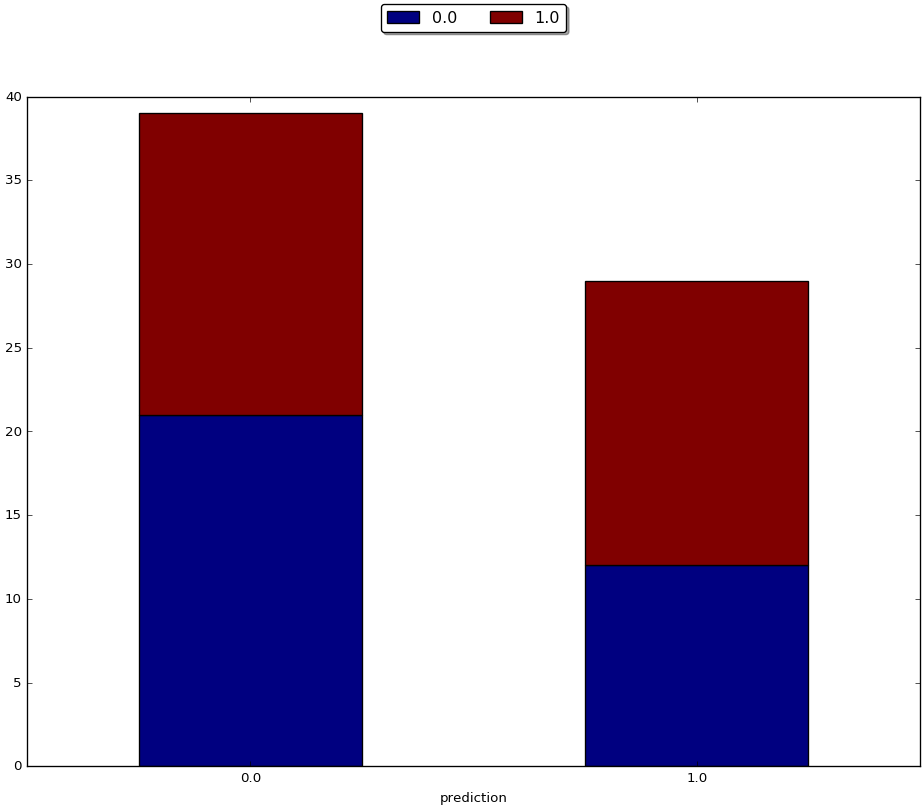

In [24]:
results.filter(results.label == results.prediction).count() / float(results.count())
display(results)

### Step 10: Model Evaluation
This step is similar to the Evaluation node in Modeler

In [63]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="label", metricName="areaUnderROC")
evaluator.evaluate(results)

0.561038961038961

### Step 10: Save Model then reload it for scoring. (deployment concept)
Save model in Object Storage. 

A separate notebook can be created for "batch scoring deployment". This deployment notebook retrieves the model from object storage and applies it to a new dataset. The notebook can be scheduled to run via the Notebook scheduler (the clock icon on the menu bar) or through the deployment interface in IBM ML (currently in beta). As a proof of concept, we will save and retrive our model in this notebook below, then use it to score again the same test data set.

#### Important note: Remember that the code below is saving this model to the same instructor's container, without access control between all users. You may want to replace the path used below with a local path in your own object storage

In [27]:
model.write().overwrite().save("swift://ConvertSPSSToNotebook2.keystone/model")

#### Read back the model from the location where it was saved above. This can be done in a different notebook altogether. (Assuming all credentials are available to access the target path)

In [28]:
from pyspark.ml import PipelineModel
sameModel = PipelineModel.load("swift://ConvertSPSSToNotebook2.keystone/model")

#### Score the newly loaded model against our test data set for demo purposes

In [29]:
newresults = sameModel.transform(testingData)
# This is a preview of 10 rows
newresults.take(5)

[Row(ID=100272, Income=43593, AppliedOnline=u'YES', Residence=u'Owner Occupier', YearCurrentAddress=13, YearsCurrentEmployer=0, NumberOfCards=1, CCDebt=2315, Loans=0, LoanAmount=12820, SalePrice=180000, Location=130, historicalLabel=0.0, AppliedOnlineEncoded=0.0, ResidenceEncoded=0.0, features=DenseVector([43593.0, 0.0, 0.0, 13.0, 0.0, 1.0, 2315.0, 0.0, 12820.0, 180000.0, 130.0]), rawPrediction=DenseVector([8.0, 4.0]), probability=DenseVector([0.6667, 0.3333]), prediction=0.0),
 Row(ID=100273, Income=45706, AppliedOnline=u'YES', Residence=u'Owner Occupier', YearCurrentAddress=17, YearsCurrentEmployer=16, NumberOfCards=2, CCDebt=373, Loans=1, LoanAmount=7275, SalePrice=145000, Location=100, historicalLabel=1.0, AppliedOnlineEncoded=0.0, ResidenceEncoded=0.0, features=DenseVector([45706.0, 0.0, 0.0, 17.0, 16.0, 2.0, 373.0, 1.0, 7275.0, 145000.0, 100.0]), rawPrediction=DenseVector([39.0, 37.0]), probability=DenseVector([0.5132, 0.4868]), prediction=0.0),
 Row(ID=100279, Income=44756, Appl